In [122]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

In [123]:
data=pd.read_csv("train.csv")

In [124]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [125]:
data.shape

(42000, 785)

In [169]:
data = np.array(data)
m, n = data.shape
np.random.shuffle(data) # shuffle before splitting into dev and training sets

data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape

In [170]:
Y_train


array([2, 4, 7, ..., 2, 8, 2], dtype=int64)

# DEFINING PARAMETERS / RANDOM VALUES TO PARAMETER

In [171]:
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

#will return Z if >0 and 0 if <0
def ReLU(Z):
    return np.maximum(0,Z)

def softmax(Z):
    Z_shifted = Z - np.max(Z, axis=0)  # Shift values to prevent overflow
    A = np.exp(Z_shifted) / np.sum(np.exp(Z_shifted), axis=0)
    return A

def forward_prop(W1, b1, W2, b2, X):
    
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def ReLU_deriv(Z):
    return Z>0

def one_hot(Y):
    one_hot_y=np.zeros((Y.size,Y.max()+1))
    one_hot_y[np.arange(Y.size),Y]=1
    one_hot_y=one_hot_y.T
    return one_hot_y



def backward_prop(Z1, A1, Z2, A2, W1, W2,X,Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_params(W1,B1,W2,B2,dW1,db1,dW2,db2,alpha):
    W1=W1-alpha*dW1
    B1=B1-alpha*db1
    W2=W2-alpha*dW2
    B2=B2-alpha*db2
    return W1,B1,W2,B2

In [172]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, B1, W2, B2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, B1, W2, B2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, B1, W2, B2 = update_params(W1, B1, W2, B2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, B1, W2, B2

In [173]:
W1,B1,W2,B2=gradient_descent(X_train,Y_train,0.20,500)

Iteration:  0
[5 2 3 ... 3 2 2] [2 4 7 ... 2 8 2]
0.09490243902439024
Iteration:  10
[5 6 3 ... 6 0 2] [2 4 7 ... 2 8 2]
0.2603170731707317
Iteration:  20
[5 6 7 ... 6 0 2] [2 4 7 ... 2 8 2]
0.3359756097560976
Iteration:  30
[8 6 7 ... 6 0 2] [2 4 7 ... 2 8 2]
0.40363414634146344
Iteration:  40
[8 6 7 ... 6 5 2] [2 4 7 ... 2 8 2]
0.4854390243902439
Iteration:  50
[8 6 7 ... 6 5 2] [2 4 7 ... 2 8 2]
0.5574146341463415
Iteration:  60
[2 4 7 ... 6 5 2] [2 4 7 ... 2 8 2]
0.6217560975609756
Iteration:  70
[2 4 7 ... 4 8 2] [2 4 7 ... 2 8 2]
0.6697560975609756
Iteration:  80
[2 4 7 ... 4 8 2] [2 4 7 ... 2 8 2]
0.7073658536585365
Iteration:  90
[2 4 7 ... 4 8 2] [2 4 7 ... 2 8 2]
0.7344634146341463
Iteration:  100
[2 4 7 ... 4 8 2] [2 4 7 ... 2 8 2]
0.7544634146341463
Iteration:  110
[2 4 7 ... 4 8 2] [2 4 7 ... 2 8 2]
0.770219512195122
Iteration:  120
[2 4 7 ... 9 8 2] [2 4 7 ... 2 8 2]
0.7828048780487805
Iteration:  130
[2 4 7 ... 3 8 2] [2 4 7 ... 2 8 2]
0.7942682926829269
Iteration:  140


In [174]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [3]
Label:  3


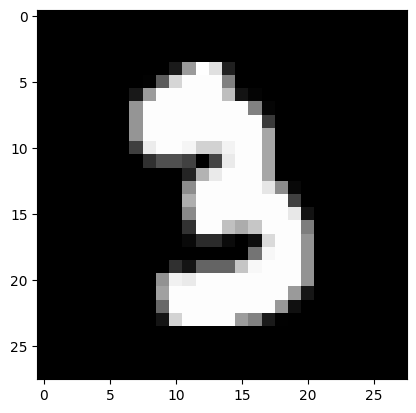

Prediction:  [0]
Label:  0


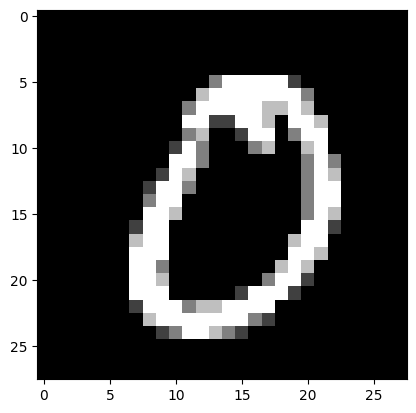

Prediction:  [9]
Label:  9


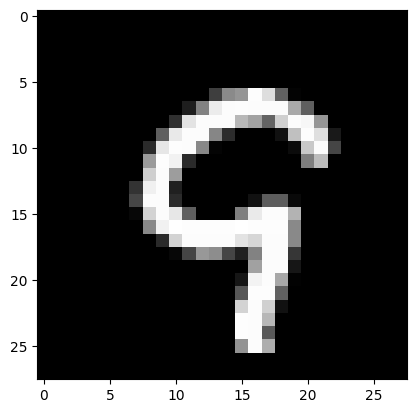

Prediction:  [3]
Label:  3


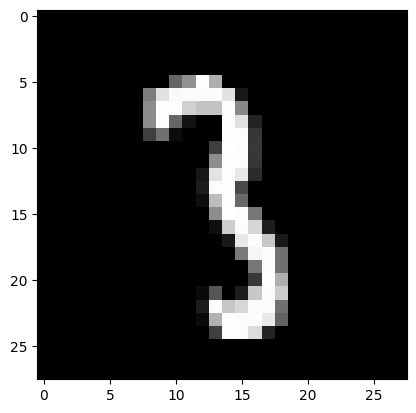

In [166]:
test_prediction(0, W1, B1, W2, B2)
test_prediction(1, W1, B1, W2, B2)
test_prediction(2, W1, B1, W2, B2)
test_prediction(3, W1, B1, W2, B2)

In [177]:
dev_predictions = make_predictions(X_dev, W1, B1, W2, B2)
get_accuracy(dev_predictions, Y_dev)

[4 1 5 3 6 0 4 6 3 7 2 7 1 5 7 2 9 8 6 3 5 8 5 1 7 1 8 8 1 4 3 7 3 1 5 5 6
 6 1 9 8 0 3 3 9 2 3 0 6 6 2 3 8 1 8 7 3 4 4 1 3 2 1 2 9 9 5 1 2 4 8 5 0 8
 0 3 7 0 0 9 1 6 0 0 3 3 3 6 4 0 3 2 7 7 4 6 7 2 8 4 6 1 8 4 8 9 8 7 1 6 8
 0 5 7 3 2 4 7 3 8 8 0 1 0 0 9 1 0 0 6 1 6 2 0 9 5 4 1 2 5 5 1 1 9 0 2 7 5
 3 0 2 6 7 0 8 0 8 6 3 9 3 5 1 0 4 3 1 3 7 5 1 7 2 8 7 6 9 9 1 3 5 3 0 2 0
 9 0 9 2 4 8 1 1 5 5 7 8 0 0 1 8 5 5 0 2 9 6 0 0 3 5 2 6 3 2 0 2 1 3 2 9 0
 8 7 3 8 8 2 2 9 4 5 2 5 7 8 4 4 3 2 9 7 1 6 9 1 0 5 0 8 4 1 9 8 8 2 2 6 6
 1 4 9 3 7 0 2 1 3 4 1 8 6 4 7 3 4 1 0 1 4 8 9 8 5 5 8 4 6 7 5 1 8 7 1 9 8
 0 8 3 8 7 9 5 9 7 8 3 7 2 1 6 0 8 5 5 7 1 4 5 0 1 1 6 0 9 3 1 1 3 8 5 1 2
 6 1 6 4 0 4 1 4 2 4 1 9 7 2 5 1 8 5 5 2 1 1 2 9 8 1 7 1 2 3 3 9 5 0 7 1 5
 0 9 7 1 3 4 3 9 6 3 1 0 6 7 3 8 3 0 6 5 0 0 2 9 3 5 0 4 3 9 0 1 9 6 7 1 4
 2 7 6 5 6 1 5 9 1 2 7 1 7 0 1 4 9 8 6 6 1 6 5 5 5 8 6 4 4 4 6 3 3 1 1 4 4
 5 0 7 2 9 9 5 7 5 2 8 5 5 2 1 1 7 5 9 6 3 8 7 8 8 7 5 7 1 0 4 4 6 9 0 1 3
 4 5 0 2 6 7 5 3 1 0 4 6 

0.875